In [1]:
import numpy as np
import pandas as pd
import torch

import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
rides = pd.read_csv('data/bike-sharing/hour.csv')
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


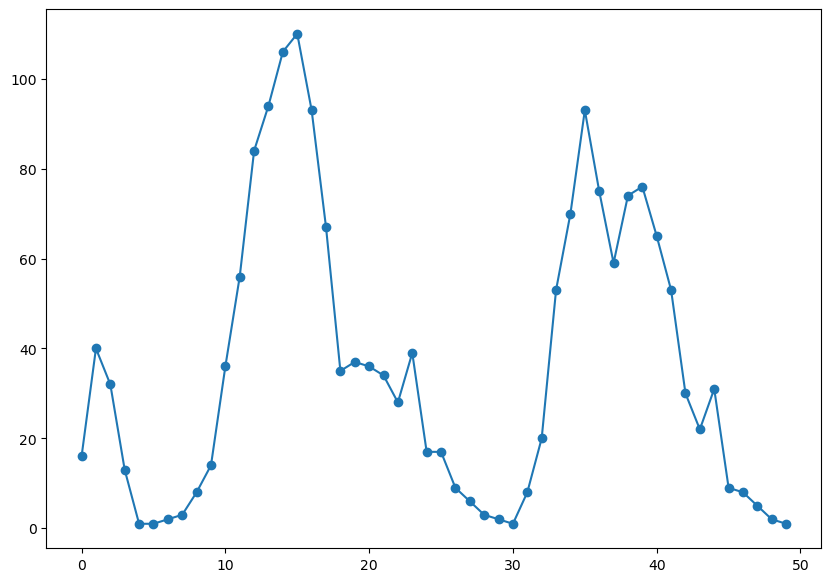

In [3]:
counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)

plt.figure(figsize= (10,7))
plt.plot(x, y, 'o-')
plt.show()

In [4]:
x = torch.FloatTensor(np.arange(len(counts), dtype=float))
x = torch.FloatTensor(np.arange(len(counts), dtype=float) / len(counts))
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [5]:
y = torch.FloatTensor(np.array(counts, dtype=float))
y

tensor([ 16.,  40.,  32.,  13.,   1.,   1.,   2.,   3.,   8.,  14.,  36.,  56.,
         84.,  94., 106., 110.,  93.,  67.,  35.,  37.,  36.,  34.,  28.,  39.,
         17.,  17.,   9.,   6.,   3.,   2.,   1.,   8.,  20.,  53.,  70.,  93.,
         75.,  59.,  74.,  76.,  65.,  53.,  30.,  22.,  31.,   9.,   8.,   5.,
          2.,   1.])

In [6]:
hidden_size = 10
W_input_hidden = torch.randn((1, hidden_size), requires_grad=True)
B_input_hidden = torch.randn((hidden_size), requires_grad=True)

W_hidden_output = torch.randn((hidden_size, 1), requires_grad=True)

In [7]:
W_input_hidden

tensor([[-0.3608, -0.1760, -0.0684, -0.7024, -1.2324,  0.9488,  0.0745, -0.7161,
         -0.3842, -1.4594]], requires_grad=True)

In [8]:
B_input_hidden

tensor([ 0.5789,  0.4563, -0.3422,  0.2367,  0.8369,  1.0546, -0.9952, -0.1542,
        -0.5791, -0.6088], requires_grad=True)

In [9]:
learning_rate = 0.001
losses = []

x = x.view(50, -1)
y = y.view(50, -1)

for i in range(100000):
    X_hidden = x * W_input_hidden + B_input_hidden
    
    O_hidden = torch.sigmoid(X_hidden)
    O = O_hidden.mm(W_hidden_output)
    
    loss = torch.mean((O - y) ** 2)
    losses.append(loss.data.numpy())
    
    if i % 10000 == 0:
        print(str(i),' loss:', loss)
    
    loss.backward()
    
    W_input_hidden.data.add_( - learning_rate * W_input_hidden.grad.data)
    B_input_hidden.data.add_( - learning_rate * B_input_hidden.grad.data)
    W_hidden_output.data.add_( - learning_rate * W_hidden_output.grad.data)
    
    W_input_hidden.grad.data.zero_()
    B_input_hidden.grad.data.zero_()
    W_hidden_output.grad.data.zero_()

0  loss: tensor(2528.0054, grad_fn=<MeanBackward0>)
10000  loss: tensor(922.5477, grad_fn=<MeanBackward0>)
20000  loss: tensor(662.4589, grad_fn=<MeanBackward0>)
30000  loss: tensor(465.6593, grad_fn=<MeanBackward0>)
40000  loss: tensor(236.6748, grad_fn=<MeanBackward0>)
50000  loss: tensor(137.6647, grad_fn=<MeanBackward0>)
60000  loss: tensor(96.7774, grad_fn=<MeanBackward0>)
70000  loss: tensor(73.7379, grad_fn=<MeanBackward0>)
80000  loss: tensor(59.7714, grad_fn=<MeanBackward0>)
90000  loss: tensor(51.3251, grad_fn=<MeanBackward0>)


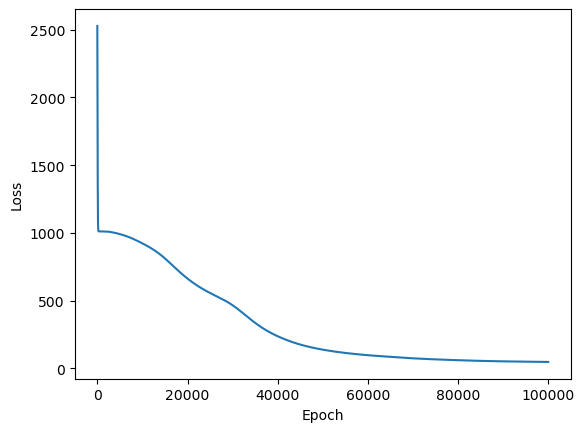

In [10]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
x_numpy = x.data.numpy()


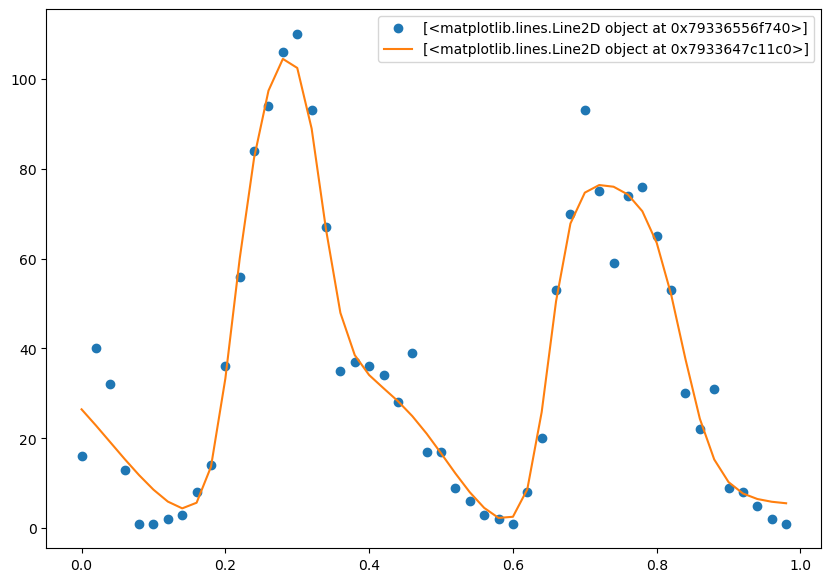

In [12]:
plt.figure(figsize=(10,7))
xplot = plt.plot(x_numpy, y.data.numpy(), 'o')
yplot = plt.plot(x_numpy, O.data.numpy())
plt.legend([xplot, yplot])
plt.show()

In [13]:
test = rides['cnt'][50:100]
x_test = torch.FloatTensor((np.arange(len(test), dtype=float) + len(counts)) / len(test))
y_test = torch.FloatTensor(np.array(test, dtype=float))

X_hidden = x_test.expand(hidden_size, len(x_test)).T * W_input_hidden.expand(len(x_test), hidden_size)
O_hidden = torch.sigmoid(X_hidden)

O = O_hidden.mm(W_hidden_output)

loss = torch.mean((O - y_test) ** 2)
print(loss)

tensor(6784.9873, grad_fn=<MeanBackward0>)


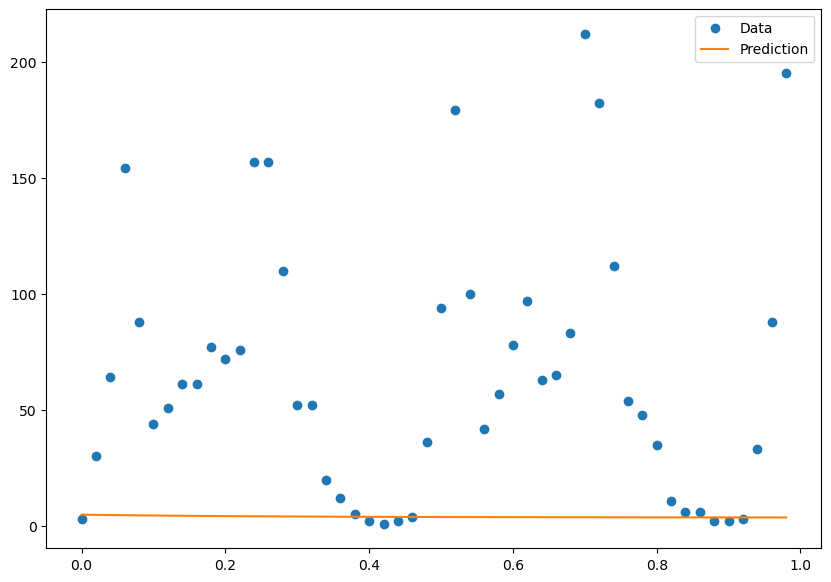

In [14]:
x_test_numpy = x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_test_numpy, y_test.data.numpy(), 'o')
yplot, = plt.plot(x_test_numpy, O.data.numpy())

plt.legend([xplot, yplot], ['Data', 'Prediction'])
plt.show()

In [15]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for i in dummy_fields:
    dummies = pd.get_dummies(rides[i], prefix=i, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0.22,0.80,0.0,8,32,40,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0.22,0.80,0.0,5,27,32,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0.24,0.75,0.0,3,10,13,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,0.24,0.75,0.0,0,1,1,True,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
quant_features  = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}

for i in quant_features:
    mean, std = data[i].mean(), data[i].std()
    scaled_features[i] = [mean, std]
    data.loc[:, i] = (data[i] - mean) / std
data.head()

/tmp/ipykernel_900453/2282529389.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.95631172 -0.82399838 -0.86810283 ... -0.54834558 -0.7082242
 -0.77438087]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, i] = (data[i] - mean) / std


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,3,13,-0.956312,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,-1.438475,0.895513,-1.553844,8,32,-0.823998,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,-1.438475,0.895513,-1.553844,5,27,-0.868103,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,-1.334609,0.636351,-1.553844,3,10,-0.972851,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,-1.334609,0.636351,-1.553844,0,1,-1.039008,True,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
test_data = data[-21 * 24:]
train_data = data[:-21 * 24]

In [18]:
target_fields = ['cnt', 'casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

test_featurs, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


In [19]:
X_input = features.values
X_input = X_input.astype(float)
Y = targets['cnt'].values
Y = Y.astype(float)

Y = np.reshape(Y, [len(Y), 1])
Y

array([[-0.95631172],
       [-0.82399838],
       [-0.86810283],
       ...,
       [ 1.30955431],
       [ 0.60939619],
       [ 0.30617811]])

In [20]:
losses = []

In [21]:
input_size = features.shape[1]
hidden_size = 10
output_size =1

batch_size = 128

neuralNet = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)

cost = torch.nn.MSELoss()

optimizer = torch.optim.SGD(neuralNet.parameters(), lr=0.01)


0 0.9332285
100 0.27482083
200 0.23396392
300 0.17748761
400 0.120781936
500 0.088591695
600 0.07489016
700 0.06835008
800 0.06466382
900 0.062304597


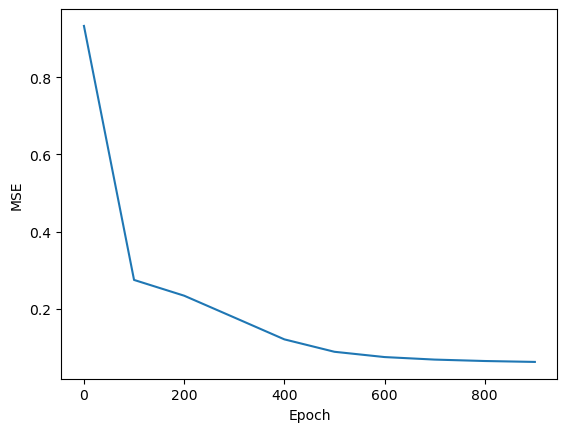

In [22]:
for i in range(1000):
    batch_loss = []
    for start in range(0, len(X_input), batch_size):
        end = start + batch_size if start + batch_size < len(X_input) else len(X_input)
        X_batch = torch.FloatTensor(X_input[start:end])
        Y_batch = torch.FloatTensor(Y[start:end])
        predict = neuralNet(X_batch)
        loss = cost(predict, Y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

plt.plot(np.arange(len(losses)) * 100, losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [23]:
targets = test_targets['cnt']
targets = targets.values.reshape([len(targets), 1])

targets = targets.astype(float)

x = torch.FloatTensor(test_featurs.values.astype(float))
y = torch.FloatTensor(targets)


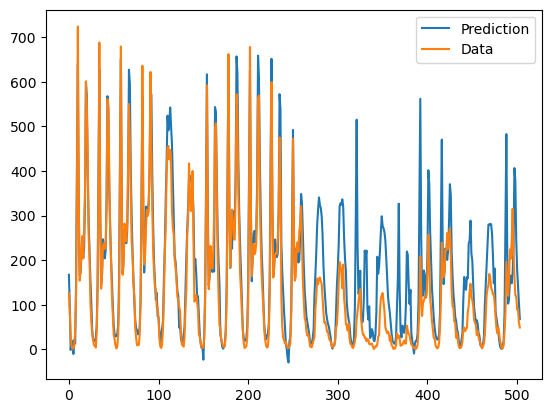

In [24]:
predict = neuralNet(x)
predict = predict.data.numpy()

fig, ax = plt.subplots()
mean, std = scaled_features['cnt']
ax.plot(predict * std + mean, label='Prediction')
ax.plot(targets * std + mean, label='Data')

ax.legend()

fig.show()
plt.show()